In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import gzip
import json

def parse(path):
    g = gzip.open(path, 'rb')
    for l in g:
        yield json.loads(l)

def getDF(path):
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')

In [2]:
df = getDF('Electronics_5.json.gz')

In [3]:
df = df.loc[:,["asin", "overall", "reviewText", "summary"]].drop_duplicates()

In [4]:
df['Review_Length']  = df['reviewText'].str.len()

In [5]:
df = df.sort_values('Review_Length', ascending=False)

In [6]:
df = df.head(100000)

In [7]:
df = df.groupby('overall', group_keys=False).apply(lambda x: x.sample(1000))

In [8]:
df.to_csv("data/amazon_electronics.csv")

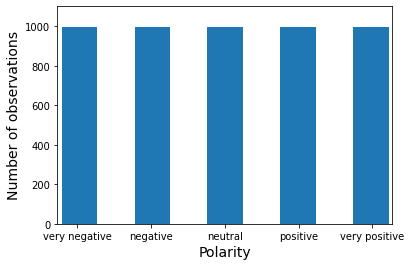

In [9]:
fig, ax = plt.subplots()
ax.set_xticks(ticks=[1.2, 2.1, 3, 3.9, 4.8], labels=['very negative','negative', 'neutral', 'positive', 'very positive'])
values, bins, bars = plt.hist(df['overall'], edgecolor='white', bins=9)
plt.xlabel("Polarity", fontsize=14)
plt.ylabel("Number of observations", fontsize=14)
plt.margins(x=0.01, y=0.1)

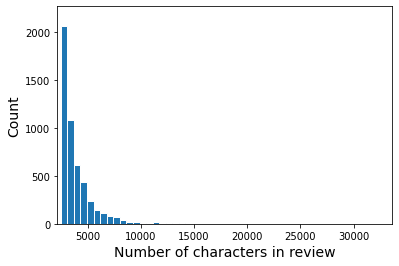

In [10]:
fig, ax = plt.subplots()
values, bins, bars = plt.hist(df['Review_Length'], edgecolor='white', bins=50)
plt.ylabel("Count", fontsize=14)
plt.xlabel("Number of characters in review", fontsize=14)
plt.margins(x=0.01, y=0.1)

## SemEval 2014 Task 4

In [12]:
laptops = pd.read_csv("data/Laptop_Train_v2.csv")

In [14]:
restaurants = pd.read_csv("data/Restaurants_Train_v2.csv")

In [15]:
sem_val = pd.concat([laptops, restaurants])

In [16]:
sem_val['Sentence_Length']  = sem_val['Sentence'].str.len()

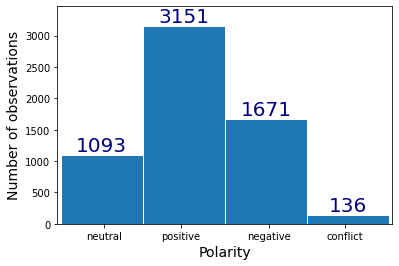

In [17]:
fig, ax = plt.subplots()
ax.set_xticks([0.4, 1.1, 1.9, 2.6])
values, bins, bars = plt.hist(sem_val['polarity'], edgecolor='white', bins=4)
plt.xlabel("Polarity", fontsize=14)
plt.ylabel("Number of observations", fontsize=14)
plt.bar_label(bars, fontsize=20, color='navy')
plt.margins(x=0.01, y=0.1)

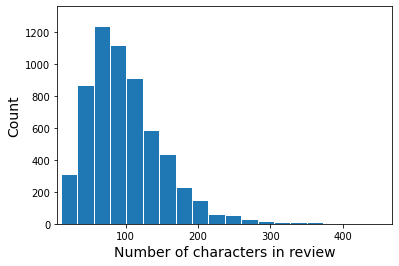

In [18]:
fig, ax = plt.subplots()
values, bins, bars = plt.hist(sem_val['Sentence_Length'], edgecolor='white', bins=20)
plt.ylabel("Count", fontsize=14)
plt.xlabel("Number of characters in review", fontsize=14)
plt.margins(x=0.01, y=0.1)

In [19]:
df = pd.DataFrame({"Domain": ["Laptops", "Restaurants", "Total"],
              "Number of reviews": [1482, 2019, 3501],
              "Number of aspects": [2358, 3693, 6051]})

display(df)

,Domain,Number of reviews,Number of aspects
0,Laptops,1482,2358
1,Restaurants,2019,3693
2,Total,3501,6051


## PolEmo 2.0

In [20]:
from datasets import load_dataset

dataset = load_dataset("clarin-pl/polemo2-official")

No config specified, defaulting to: polemo2-official/all_text
Found cached dataset polemo2-official (C:/Users/welki/.cache/huggingface/datasets/clarin-pl___polemo2-official/all_text/0.0.0/2b75fdbe5def97538e81fb120f8752744b50729a4ce09bd75132bfc863a2fd70)


  0%|          | 0/3 [00:00<?, ?it/s]

In [21]:
polemo = pd.DataFrame({
    "review": dataset['train']['text'],
    "label": dataset['train']['target']
})

In [22]:
polemo.loc[polemo.label==0,'label'] = "neutral"
polemo.loc[polemo.label==1,'label'] = "negative"
polemo.loc[polemo.label==2,'label'] = "positive"
polemo.loc[polemo.label==3,'label'] = "ambivalent"

In [23]:
polemo['Review_Length']  = polemo['review'].str.len()

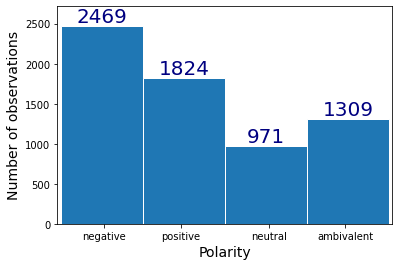

In [24]:
fig, ax = plt.subplots()
ax.set_xticks([0.4, 1.1, 1.9, 2.6])
values, bins, bars = plt.hist(polemo['label'], edgecolor='white', bins=4)
plt.xlabel("Polarity", fontsize=14)
plt.ylabel("Number of observations", fontsize=14)
plt.bar_label(bars, fontsize=20, color='navy')
plt.margins(x=0.01, y=0.1)

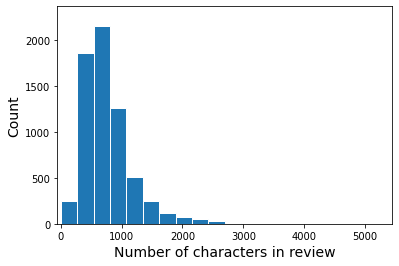

In [25]:
fig, ax = plt.subplots()
values, bins, bars = plt.hist(polemo['Review_Length'], edgecolor='white', bins=20)
plt.ylabel("Count", fontsize=14)
plt.xlabel("Number of characters in review", fontsize=14)
plt.margins(x=0.01, y=0.1)

In [26]:
polemo.to_csv("data/polemo.csv", encoding="utf-8")